# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dschettler8845/brats-2021-task1")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'brats-2021-task1' dataset.
Path to dataset files: /kaggle/input/brats-2021-task1


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!mv {path} /content/drive/MyDrive/brats2021


mv: inter-device move failed: '/kaggle/input/brats-2021-task1' to '/content/drive/MyDrive/brats2021/brats-2021-task1'; unable to remove target: Directory not empty


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [5]:
!tar -xvf /content/drive/MyDrive/brats2021/BraTS2021_00495.tar \
     -C /content/drive/MyDrive/brats2021/


./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


In [6]:
!ls /content/drive/MyDrive/brats2021/BraTS2021_00495



ls: cannot access '/content/drive/MyDrive/brats2021/BraTS2021_00495': No such file or directory


In [7]:
file_path = '/content/drive/MyDrive/brats2021/BraTS2021_00495_flair.nii.gz'
mri = nib.load(file_path).get_fdata()
print(f'MRI shape: {mri.shape}')

MRI shape: (240, 240, 155)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

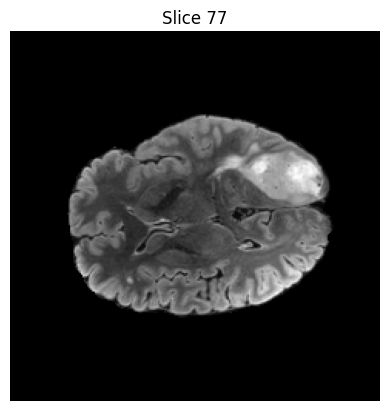

In [8]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [9]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

155

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

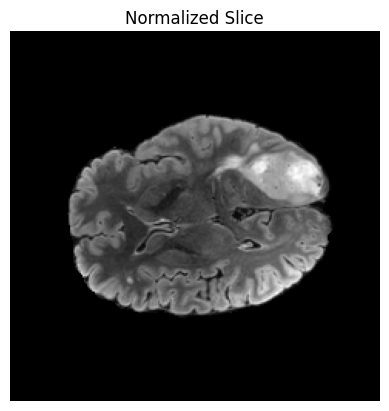

In [10]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

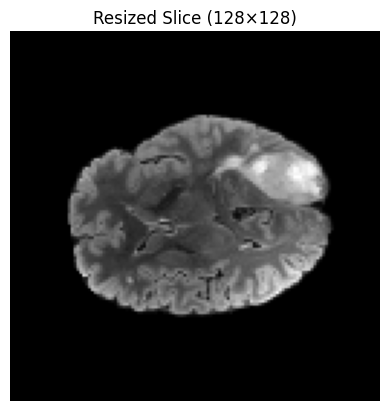

In [11]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


In [12]:
#Loading another 5 slices
!tar -xvf /content/drive/MyDrive/brats2021/BraTS2021_00621.tar\
     -C /content/drive/MyDrive/brats2021/


./
./BraTS2021_00621_flair.nii.gz
./BraTS2021_00621_seg.nii.gz
./BraTS2021_00621_t1.nii.gz
./BraTS2021_00621_t1ce.nii.gz
./BraTS2021_00621_t2.nii.gz


In [13]:
file_path = '/content/drive/MyDrive/brats2021/BraTS2021_00621_t2.nii.gz'
mri = nib.load(file_path).get_fdata()
print(f'MRI shape: {mri.shape}')

MRI shape: (240, 240, 155)


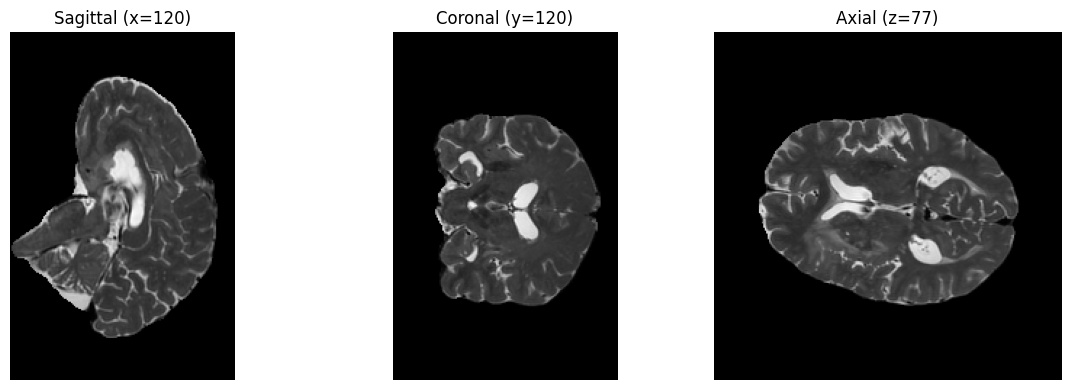

In [27]:

x_mid = mri.shape[0] // 2
y_mid = mri.shape[1] // 2
z_mid = mri.shape[2] // 2

plt.figure(figsize = (12,4))

# Sagittal slice
plt.subplot(1, 3, 1)
plt.imshow(mri[x_mid, :, :], cmap='gray')
plt.title(f"Sagittal (x={x_mid})")
plt.axis('off')

# Coronal slice
plt.subplot(1, 3, 2)
plt.imshow(mri[:, y_mid, :], cmap='gray')
plt.title(f"Coronal (y={y_mid})")
plt.axis('off')

# Axial slice
plt.subplot(1, 3, 3)
plt.imshow(mri[:, :, z_mid], cmap='gray')
plt.title(f"Axial (z={z_mid})")
plt.axis('off')

plt.tight_layout()
plt.show()


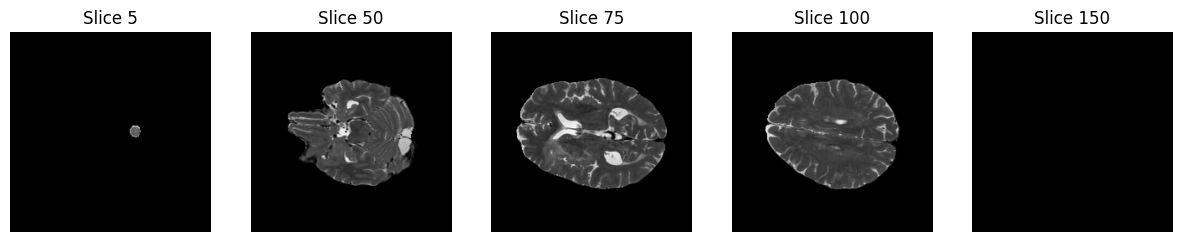

In [38]:
def plot_slices(volume, indices):
    n = len(indices)
    plt.figure(figsize=(3*n, n))
    for i, index in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(volume[:, :, index], cmap='gray') # Changed plt.show to plt.imshow
        plt.title(f'Slice {index}')
        plt.axis('off')
    plt.show() # Moved plt.show outside the loop and added parentheses

plot_slices(mri, [5, 50, 75, 100, 150])

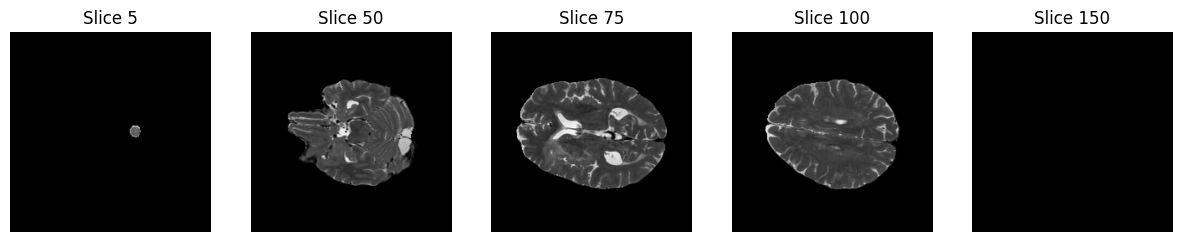

In [39]:
def normalization(volume,indices):
  n = len(indices)
  plt.figure(figsize=(3*n, n))
  for i, index in enumerate(indices):
    norm_slice = (volume[:, :, index] - np.min(volume)) / (np.max(volume) - np.min(volume))
    plt.subplot(1, n, i+1)
    plt.imshow(norm_slice, cmap='gray')
    plt.title(f'Slice {index}')
    plt.axis('off')
  plt.show()



normalization(mri, [5, 50, 75, 100, 150])



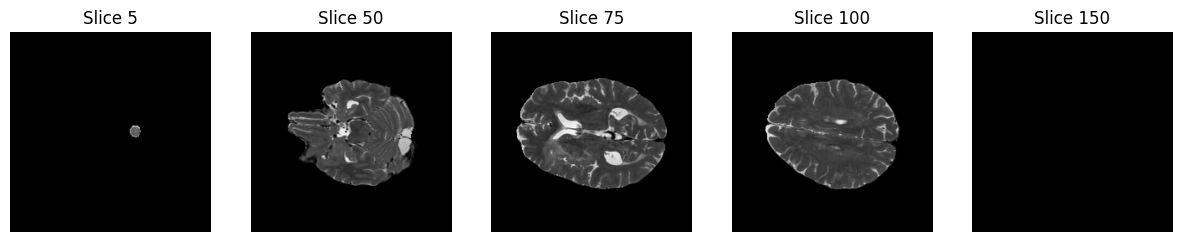

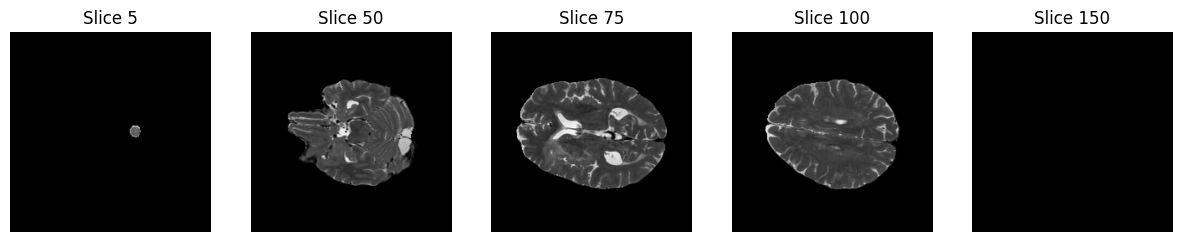

In [40]:
def normalize_volume(volume):
    vmin = np.min(volume)
    vmax = np.max(volume)

    if vmax - vmin == 0:
        return volume.copy()

    return (volume - vmin) / (vmax - vmin)
mri_norm = normalize_volume(mri)
plot_slices(mri_norm, [5, 50, 75, 100, 150])
plot_slices(mri, [5, 50, 75, 100, 150])

In [43]:
# Resizing && Masking
mask_img = nib.load("/content/drive/MyDrive/brats2021/BraTS2021_00621_seg.nii.gz")
mask = mask_img.get_fdata()
import cv2

def resize_and_count_tumor(volume, mask=None, size=(128, 128)):
    resized_slices = []
    tumor_slice_count = 0

    for i in range(volume.shape[2]):
        slice_img = volume[:, :, i]
        resized = cv2.resize(slice_img, size)
        resized_slices.append(resized)

        if mask is not None:
            if np.any(mask[:, :, i] > 0):
                tumor_slice_count += 1

    resized_volume = np.stack(resized_slices, axis=2)
    return resized_volume, tumor_slice_count

mri_resized, tumor_count = resize_and_count_tumor(mri_norm, mask)

print("Resized volume shape:", mri_resized.shape)
print("Number of tumor-containing slices:", tumor_count)


Resized volume shape: (128, 128, 155)
Number of tumor-containing slices: 63


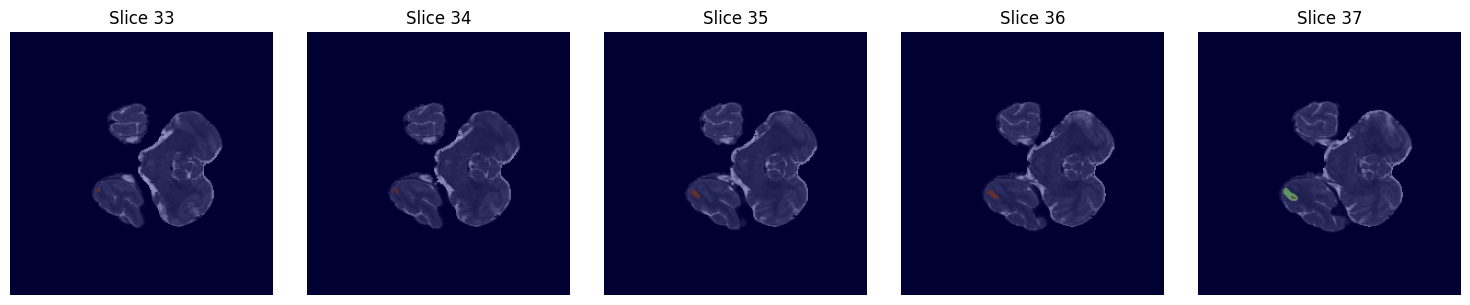

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def show_tumor_slices(volume, mask, num_slices=5, overlay=True):
    """
    volume     : 3D MRI volume
    mask       : 3D tumor mask (same shape)
    num_slices : number of tumor slices to show
    overlay    : overlay tumor on MRI if True
    """

    # Find indices of slices containing tumor
    tumor_indices = [i for i in range(mask.shape[2]) if np.any(mask[:, :, i] > 0)]

    if len(tumor_indices) == 0:
        print("No tumor slices found.")
        return

    # Select first few tumor slices
    selected = tumor_indices[:num_slices]

    plt.figure(figsize=(3 * len(selected), 3))

    for i, idx in enumerate(selected):
        plt.subplot(1, len(selected), i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')

        if overlay:
            plt.imshow(mask[:, :, idx], cmap='jet', alpha=0.4)

        plt.title(f"Slice {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
show_tumor_slices(mri_norm, mask, num_slices=5, overlay=True)